# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [39]:
import pandas as pd


In [40]:
df = pd.read_csv("D:\projects\British_Airways_Forage\Data\customer_booking.xls", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [42]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [43]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [44]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [45]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

Next step is checking for missing values and dropping the rows with missing values. From the below output, we can see that there are no Null values. So no need to drop any rows

## Step-1: Data Exploration

In [46]:
# Check for missing values
df.isnull().sum()
# Dropping rows or filling missing values- Not required in this case
# df = df.dropna()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [47]:
# Check the unique values of categorical columns to decide how to handle them
print("Unique values in 'sales_channel':", df['sales_channel'].unique())
print("Unique values in 'trip_type':", df['trip_type'].unique())
print("Unique values in 'route':", df['route'].unique())
print("Unique values in 'booking_origin':", df['booking_origin'].unique())

Unique values in 'sales_channel': ['Internet' 'Mobile']
Unique values in 'trip_type': ['RoundTrip' 'CircleTrip' 'OneWay']
Unique values in 'route': ['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CCUMRU' 'CCUOOL' 'CCUPER' 'CCUSYD' 'CCUTPE' 'CEBMEL' 'CEBOOL'
 'CEBPER' 'CEBSYD' 'CGKCKG' 'CGKCTS' 'CGKCTU' 'CG

In [48]:
# Step 1.1: Handling Missing Values
# For simplicity, we'll drop rows with missing values, but you can choose to impute them
df = df.dropna()

### Step-1.2: Feature Engineering( Introducing New columns based on existing data which might contribute to the model prediction)

In [49]:
# Step 1.2: Feature Engineering

# Feature 1: Create a new feature 'short_trip' based on length_of_stay
df['short_trip'] = df['length_of_stay'].apply(lambda x: 1 if x <= 2 else 0)

# Feature 2: Last-minute Booking
df['last_minute_booking'] = df['purchase_lead'].apply(lambda x: 1 if x <= 3 else 0)

# Feature 3: Flight Hour Categories
df['is_morning_flight'] = df['flight_hour'].apply(lambda x: 1 if 5 <= x < 12 else 0)
df['is_afternoon_flight'] = df['flight_hour'].apply(lambda x: 1 if 12 <= x < 18 else 0)
df['is_evening_flight'] = df['flight_hour'].apply(lambda x: 1 if 18 <= x < 22 else 0)
df['is_night_flight'] = df['flight_hour'].apply(lambda x: 1 if (x >= 22 or x < 5) else 0)

# Feature 4: Weekend Flight
df['is_weekend_flight'] = df['flight_day'].apply(lambda x: 1 if x in [5, 6] else 0)

# Feature 5: Wants Multiple Services
df['wants_multiple_services'] = df[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].sum(axis=1).apply(lambda x: 1 if x > 1 else 0)

# Feature 6: Frequent Origin
df['is_frequent_origin'] = df['booking_origin'].apply(lambda x: 1 if x in df['booking_origin'].value_counts().index[:5] else 0)

# Feature 7: Short Trip with Weekend Morning Flight
df['short_trip_weekend_morning'] = df.apply(lambda x: 1 if x['short_trip'] == 1 and x['is_weekend_flight'] == 1 and x['is_morning_flight'] == 1 else 0, axis=1)
df.head()

KeyboardInterrupt: 

In [ ]:
# Step 1.3: Encoding Categorical Variables
# Convert categorical columns like sales_channel, trip_type, and booking_origin into numerical codes
df['sales_channel'] = df['sales_channel'].astype('category').cat.codes
df['trip_type'] = df['trip_type'].astype('category').cat.codes
df['route'] = df['route'].astype('category').cat.codes
df['booking_origin'] = df['booking_origin'].astype('category').cat.codes
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,short_trip,last_minute_booking,is_morning_flight,is_afternoon_flight,is_evening_flight,is_night_flight,is_weekend_flight,wants_multiple_services,is_frequent_origin,short_trip_weekend_morning
0,2,0,2,262,19,7,6,0,61,1,...,0,0,1,0,0,0,1,0,0,0
1,1,0,2,112,20,3,6,0,61,0,...,0,0,0,0,0,1,1,0,0,0
2,2,0,2,243,22,17,3,0,36,1,...,0,0,0,1,0,0,0,1,0,0
3,1,0,2,96,31,4,6,0,61,0,...,0,0,0,0,0,1,1,0,0,0
4,2,0,2,68,22,15,3,0,36,1,...,0,0,0,1,0,0,0,1,0,0


## Step-2:Splitting the Data for Training and Testing

In [14]:
# Step 2: Train-Test Split
from sklearn.model_selection import train_test_split

# Define the feature set (X) and target variable (y)
X = df.drop(columns=['booking_complete'])  # Drop the target column
y = df['booking_complete']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step-3: Train the data using ML algorithms- RandomForest Classifier
### For this scenario the most suitable algorithm is RandomForest Classifier since it can handle both numerical and categorical data, and can model non-linear relationships.Also, it can provide feature importance, which helps understand the contribution of different features.

In [ ]:
# Step 3: Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Step-4: Model Evaluation

In [16]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model using classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8553
Confusion Matrix:
 [[8413  107]
 [1340  140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.09      0.16      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.54      0.54     10000
weighted avg       0.82      0.86      0.81     10000



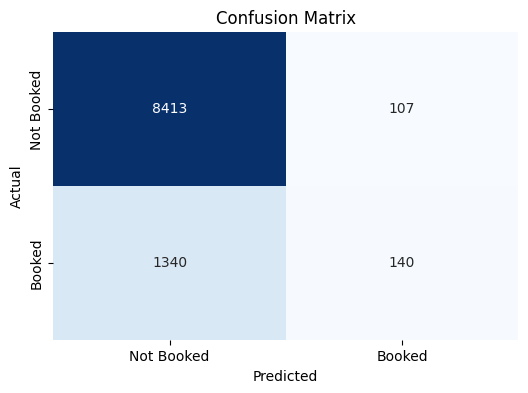

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Visualization
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=["Not Booked", "Booked"], 
                yticklabels=["Not Booked", "Booked"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Call the function to visualize the confusion matrix
plot_confusion_matrix(y_test, y_pred)

**Conclusion:**
The model performs well for predicting the majority class (Class 0-Not booked), but struggles significantly with the minority class (class 1-booked). This suggests that the model might be biased towards the majority class, which is common in imbalanced datasets.

**Improvements:**
To improve the models performance, especially for the minority class, consider the following approaches:

- Class Weighting: Assign a higher weight to the minority class during model training.
- Oversampling: Increase the number of instances of the minority class using techniques like SMOTE (Synthetic Minority Over-sampling Technique).

## Step-5: Feature Improtance Visualization using Matplotlib

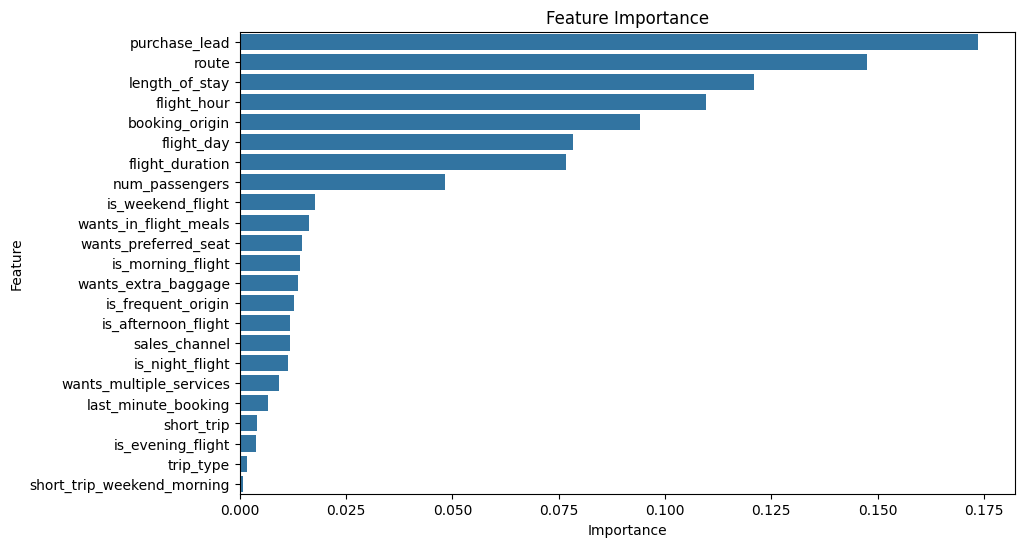

In [ ]:
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store the feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 2: Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 3: Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]  # Try using class weighting
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_rf_model = grid_search.best_estimator_

# Step 4: Train the best model on the resampled data
best_rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_resampled = best_rf_model.predict(X_test_resampled)

# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test_resampled, y_pred_resampled))
print("Confusion Matrix:\n", confusion_matrix(y_test_resampled, y_pred_resampled))
print("Classification Report:\n", classification_report(y_test_resampled, y_pred_resampled))

c:\Users\Nithish Reddy\anaconda3\envs\BAenv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Accuracy: 0.9014639308601329
Confusion Matrix:
 [[7834  610]
 [1066 7499]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      8444
           1       0.92      0.88      0.90      8565

    accuracy                           0.90     17009
   macro avg       0.90      0.90      0.90     17009
weighted avg       0.90      0.90      0.90     17009



In [84]:
print(best_rf_model.predict_proba(X_test_resampled))


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- is_afternoon_flight
- is_evening_flight
- is_frequent_origin
- is_morning_flight
- is_night_flight
- ...


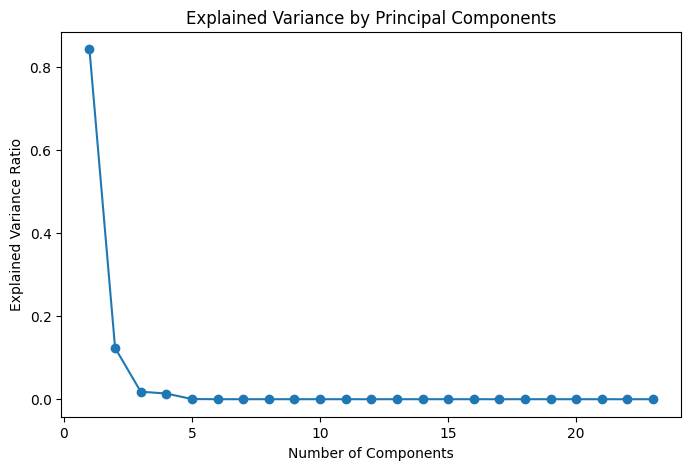

In [73]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_resampled)

# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.show()


## Training with XGBOOST model and evaluating the model

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, random_state=42)

# Step 2: Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Step 3: Make predictions
y_pred_xgb = xgb_model.predict(X_test_resampled)

# Step 4: Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test_resampled, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test_resampled, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test_resampled, y_pred_xgb))


c:\Users\Nithish Reddy\anaconda3\envs\BAenv\lib\site-packages\xgboost\core.py:158: UserWarning: [13:37:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8803574578164501
XGBoost Confusion Matrix:
 [[7635  809]
 [1226 7339]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      8444
           1       0.90      0.86      0.88      8565

    accuracy                           0.88     17009
   macro avg       0.88      0.88      0.88     17009
weighted avg       0.88      0.88      0.88     17009



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_resampled)

# Step 2: Initialize Logistic Regression with Increased Iterations and Alternative Solver
log_reg = LogisticRegression(max_iter=1000, solver='saga', random_state=42)

# Step 3: Train the Model
log_reg.fit(X_train_scaled, y_train_resampled)

# Step 4: Make Predictions
y_pred_logreg = log_reg.predict(X_test_scaled)

# Step 5: Evaluate the Model
print("Logistic Regression Accuracy:", accuracy_score(y_test_resampled, y_pred_logreg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test_resampled, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test_resampled, y_pred_logreg))


Logistic Regression Accuracy: 0.7541301663825034
Logistic Regression Confusion Matrix:
 [[7168 1276]
 [2906 5659]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.85      0.77      8444
           1       0.82      0.66      0.73      8565

    accuracy                           0.75     17009
   macro avg       0.76      0.75      0.75     17009
weighted avg       0.76      0.75      0.75     17009



In [23]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Step 1: Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_resampled)

# Step 2: Initialize SVM Model with Randomized Hyperparameter Tuning
# Reduced parameter search space for faster tuning
param_dist = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1],
    'kernel': ['linear', 'rbf']  # Focusing on commonly used kernels
}

# Using RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    SVC(class_weight='balanced', random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to test
    cv=3,  # 3-fold cross-validation
    scoring='f1',  # Focus on F1 score
    n_jobs=-1,  # Use all available cores for parallel computation
    random_state=42
)

# Step 3: Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train_resampled)

# Best model from the search
best_svm_model = random_search.best_estimator_

# Step 4: Train the Best Model
best_svm_model.fit(X_train_scaled, y_train_resampled)

# Step 5: Make Predictions
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Step 6: Evaluate the Model
print("SVM Accuracy:", accuracy_score(y_test_resampled, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test_resampled, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test_resampled, y_pred_svm))

# Optional: Print the Best Parameters
print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)


SVM Accuracy: 0.8235052031277559
SVM Confusion Matrix:
 [[7168 1276]
 [1726 6839]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      8444
           1       0.84      0.80      0.82      8565

    accuracy                           0.82     17009
   macro avg       0.82      0.82      0.82     17009
weighted avg       0.82      0.82      0.82     17009

Best Parameters from RandomizedSearchCV: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


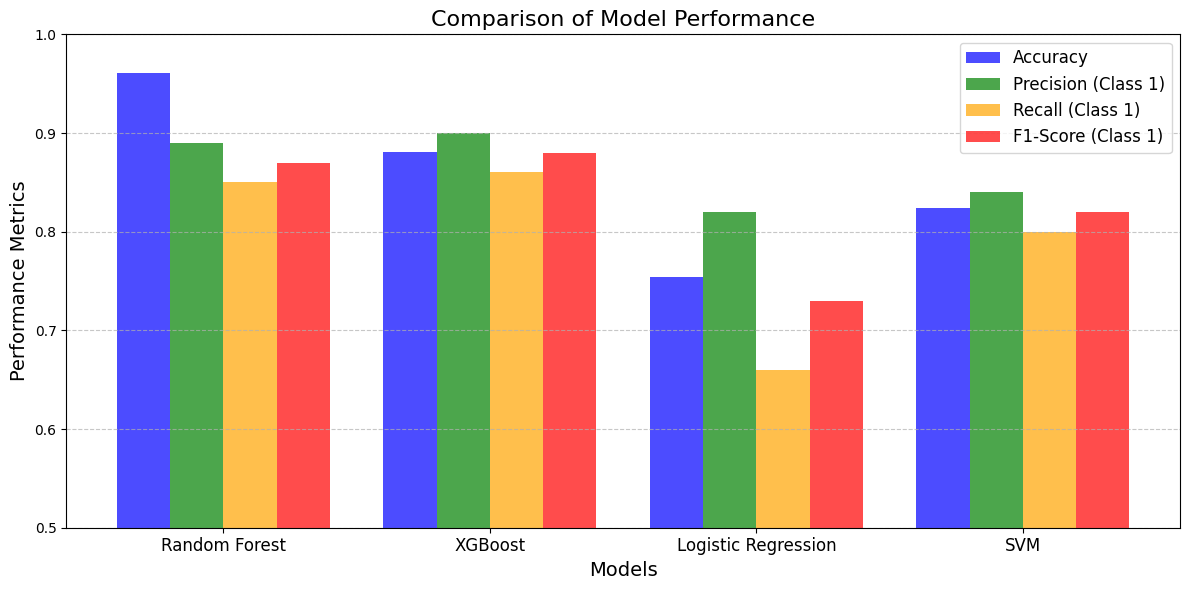

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Model performance metrics
models = ['Random Forest', 'XGBoost', 'Logistic Regression', 'SVM']
accuracy = [0.9613, 0.8804, 0.7541, 0.8235]
precision_class1 = [0.89, 0.90, 0.82, 0.84]
recall_class1 = [0.85, 0.86, 0.66, 0.80]
f1_score_class1 = [0.87, 0.88, 0.73, 0.82]

# Bar width
bar_width = 0.2
index = np.arange(len(models))

# Plot the metrics
fig, ax = plt.subplots(figsize=(12, 6))

# Accuracy bars
plt.bar(index, accuracy, bar_width, label='Accuracy', color='blue', alpha=0.7)

# Precision bars
plt.bar(index + bar_width, precision_class1, bar_width, label='Precision (Class 1)', color='green', alpha=0.7)

# Recall bars
plt.bar(index + 2 * bar_width, recall_class1, bar_width, label='Recall (Class 1)', color='orange', alpha=0.7)

# F1-Score bars
plt.bar(index + 3 * bar_width, f1_score_class1, bar_width, label='F1-Score (Class 1)', color='red', alpha=0.7)

# Add labels and titles
plt.xlabel('Models', fontsize=14)
plt.ylabel('Performance Metrics', fontsize=14)
plt.title('Comparison of Model Performance', fontsize=16)
plt.xticks(index + 1.5 * bar_width, models, fontsize=12)
plt.legend(fontsize=12)
plt.ylim(0.5, 1.0)  # Adjust the y-axis limit for better visualization

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


                       Feature  Importance
3                purchase_lead    0.173598
7                        route    0.147511
4               length_of_stay    0.120974
5                  flight_hour    0.109548
8               booking_origin    0.094239
6                   flight_day    0.078448
12             flight_duration    0.076830
0               num_passengers    0.048227
19           is_weekend_flight    0.017791
11       wants_in_flight_meals    0.016295
10        wants_preferred_seat    0.014704
15           is_morning_flight    0.014166
9          wants_extra_baggage    0.013809
21          is_frequent_origin    0.012870
16         is_afternoon_flight    0.011879
1                sales_channel    0.011700
18             is_night_flight    0.011394
20     wants_multiple_services    0.009324
14         last_minute_booking    0.006640
13                  short_trip    0.003954
17           is_evening_flight    0.003815
2                    trip_type    0.001614
22  short_t

C:\Users\Nithish Reddy\AppData\Local\Temp\ipykernel_18004\1468548601.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importances, x='Importance', y='Feature', palette='viridis')


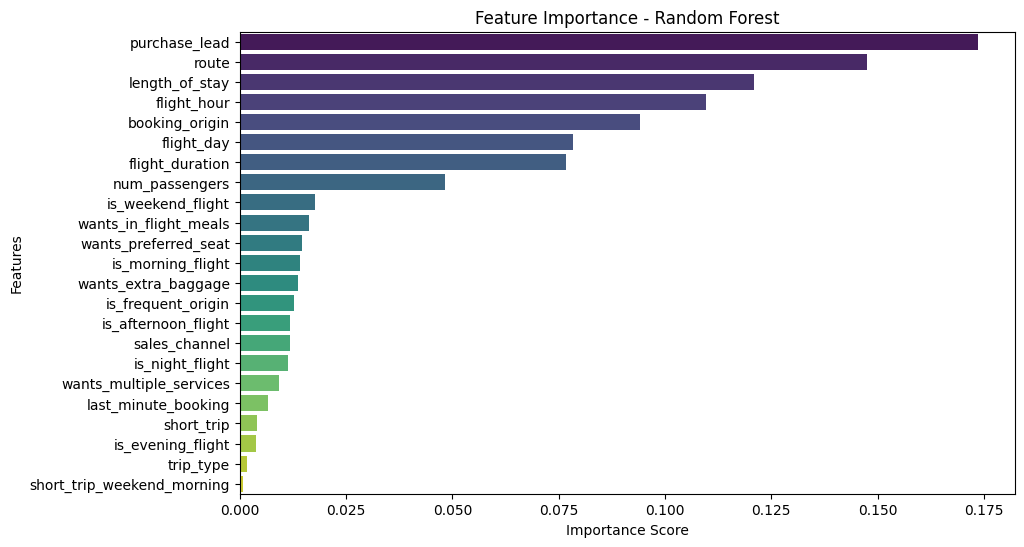

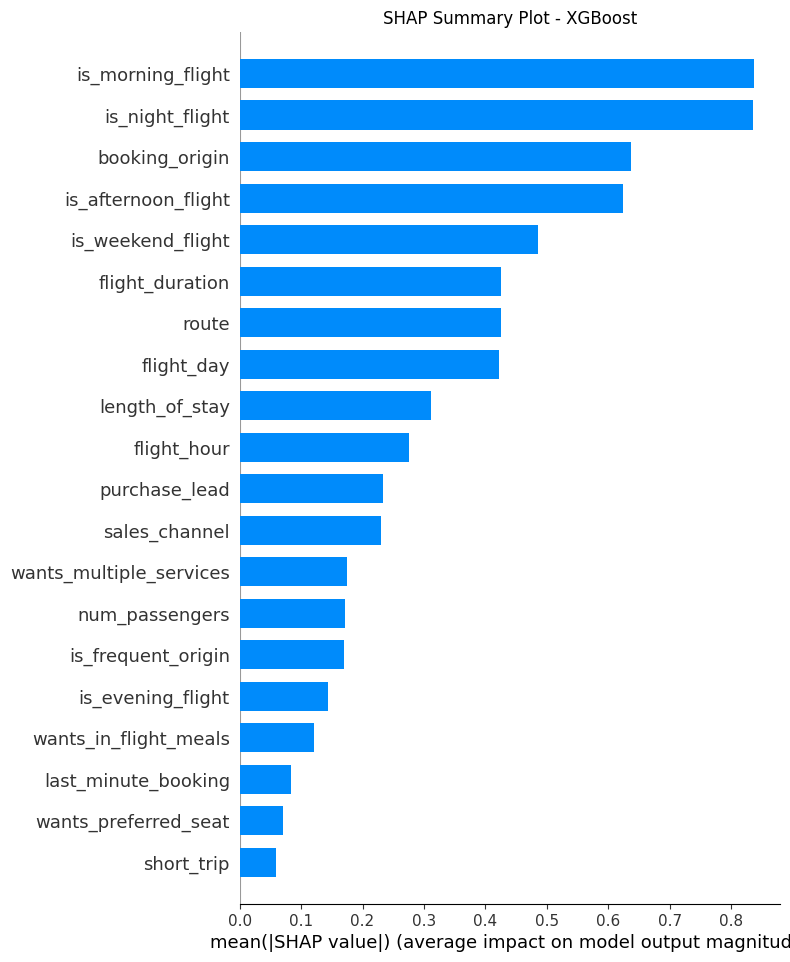

C:\Users\Nithish Reddy\AppData\Local\Temp\ipykernel_18004\1468548601.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=perm_importances, x='Importance', y='Feature', palette='coolwarm')


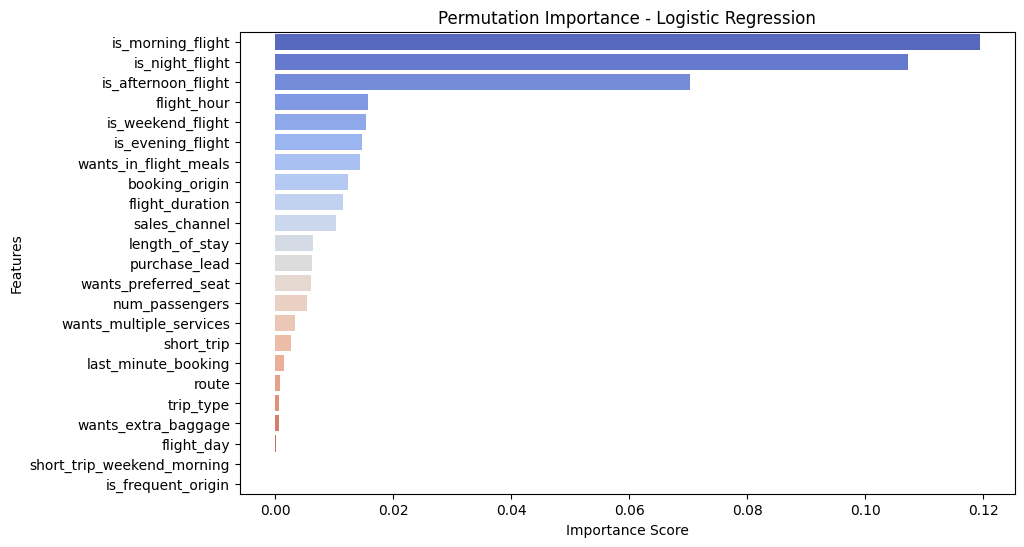

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
import shap

# Assume models are already trained, and X_train is the feature set

# Feature Importance for Random Forest
rf_feature_importance = rf_model.feature_importances_
rf_importances = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': rf_feature_importance
}).sort_values(by='Importance', ascending=False)
print(rf_importances)

# Plot Feature Importance for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# SHAP Values for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_train_resampled, plot_type="bar", show=False)
plt.title("SHAP Summary Plot - XGBoost")
plt.show()

# Permutation Importance for Logistic Regression
perm_importance = permutation_importance(log_reg, X_train_scaled, y_train_resampled, n_repeats=10, random_state=42)

# Use the original DataFrame's columns for feature names
perm_importances = pd.DataFrame({
    'Feature': X_train.columns,  # Extract column names from the original DataFrame
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot Permutation Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=perm_importances, x='Importance', y='Feature', palette='coolwarm')
plt.title('Permutation Importance - Logistic Regression')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [29]:
# Check class distribution
print(y_resampled.value_counts())

# Calculate the percentage of each class
class_distribution = y_resampled.value_counts(normalize=True) * 100
print(class_distribution)


booking_complete
0    42522
1    42522
Name: count, dtype: int64
booking_complete
0    50.0
1    50.0
Name: proportion, dtype: float64


In [61]:
# Select high-importance features based on your feature importance scores
selected_features = ['purchase_lead', 'route', 'length_of_stay', 'flight_hour', 'booking_origin', 'flight_day', 'flight_duration']

# Create new data frames with only the selected features
X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test_resampled[selected_features]

# Check the shape of the new data
print(X_train_selected.shape, X_test_selected.shape)

#Below feature engineering is not required since the model performance is reduced because of this
# Feature engineering: Categorizing 'purchase_lead' into bins
#X_train_selected['purchase_lead'] = pd.cut(X_train_selected['purchase_lead'], bins=[0, 30, 60, 90, 120], labels=['Short', 'Medium', 'Long', 'Very Long'])
#X_test_selected['purchase_lead'] = pd.cut(X_test_selected['purchase_lead'], bins=[0, 30, 60, 90, 120], labels=['Short', 'Medium', 'Long', 'Very Long'])

# Create new features based on 'flight_hour' (e.g., categorize into time of day)
#X_train_selected['flight_hour'] = pd.cut(X_train_selected['flight_hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
#X_test_selected['flight_hour'] = pd.cut(X_test_selected['flight_hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Check the transformed data
X_train_selected.head()
class_counts = pd.Series(y_train_resampled).value_counts()
print("Class distribution in y_train_resampled:")
print(class_counts)



(68035, 7) (17009, 7)
Class distribution in y_train_resampled:
booking_complete
0    34078
1    33957
Name: count, dtype: int64


C:\Users\Nithish Reddy\AppData\Local\Temp\ipykernel_18004\671100714.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_selected['purchase_lead'] = pd.cut(X_train_selected['purchase_lead'], bins=[0, 30, 60, 90, 120], labels=['Short', 'Medium', 'Long', 'Very Long'])
C:\Users\Nithish Reddy\AppData\Local\Temp\ipykernel_18004\671100714.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_selected['purchase_lead'] = pd.cut(X_test_selected['purchase_lead'], bins=[0, 30, 60, 90, 120], labels=['Shor

In [65]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
#label_encoder = LabelEncoder()

# Encode the categorical features
#X_train_selected['purchase_lead'] = label_encoder.fit_transform(X_train_selected['purchase_lead'])
#X_test_selected['purchase_lead'] = label_encoder.transform(X_test_selected['purchase_lead'])

#X_train_selected['flight_hour'] = label_encoder.fit_transform(X_train_selected['flight_hour'])
#X_test_selected['flight_hour'] = label_encoder.transform(X_test_selected['flight_hour'])

# Step 1: Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]  # Try using class weighting
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_selected, y_train_resampled)

# Best model
best_rf_model_select = grid_search.best_estimator_

# Step 4: Train the best model on the resampled data
best_rf_model_select.fit(X_train_selected, y_train_resampled)

y_pred_resampled = best_rf_model_select.predict(X_test_selected)

# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test_resampled, y_pred_resampled))
print("Confusion Matrix:\n", confusion_matrix(y_test_resampled, y_pred_resampled))
print("Classification Report:\n", classification_report(y_test_resampled, y_pred_resampled))


Accuracy: 0.8610147568934093
Confusion Matrix:
 [[7011 1433]
 [ 931 7634]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86      8444
           1       0.84      0.89      0.87      8565

    accuracy                           0.86     17009
   macro avg       0.86      0.86      0.86     17009
weighted avg       0.86      0.86      0.86     17009



C:\Users\Nithish Reddy\AppData\Local\Temp\ipykernel_18004\1427982762.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='coolwarm')


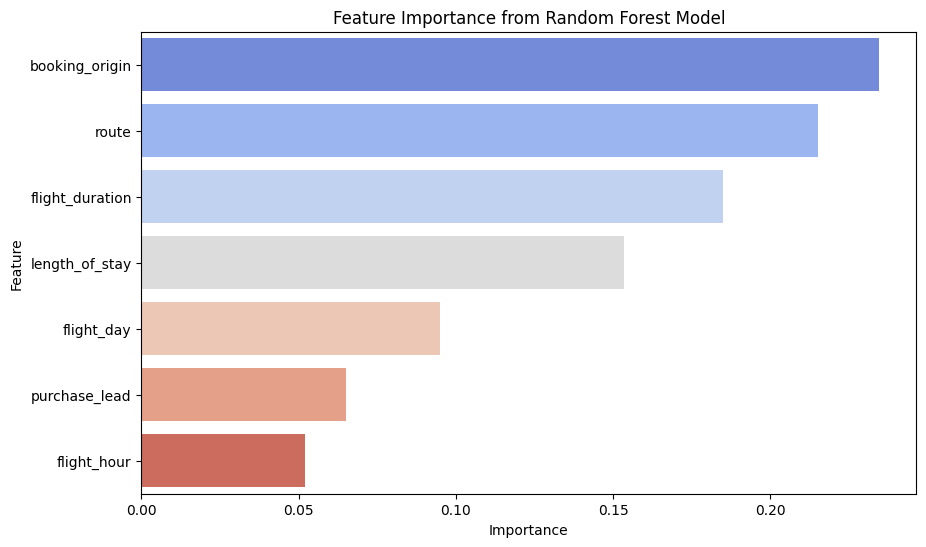

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract feature importances
importances = best_rf_model.feature_importances_

# Create a DataFrame to hold feature names and their corresponding importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='coolwarm')
plt.title("Feature Importance from Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [67]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, random_state=42)

# Step 2: Train the model
xgb_model.fit(X_train_selected, y_train_resampled)

# Step 3: Make predictions
y_pred_xgb = xgb_model.predict(X_test_selected)

# Step 4: Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test_resampled, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test_resampled, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test_resampled, y_pred_xgb))


c:\Users\Nithish Reddy\anaconda3\envs\BAenv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:38:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8304427068022812
XGBoost Confusion Matrix:
 [[6977 1467]
 [1417 7148]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      8444
           1       0.83      0.83      0.83      8565

    accuracy                           0.83     17009
   macro avg       0.83      0.83      0.83     17009
weighted avg       0.83      0.83      0.83     17009



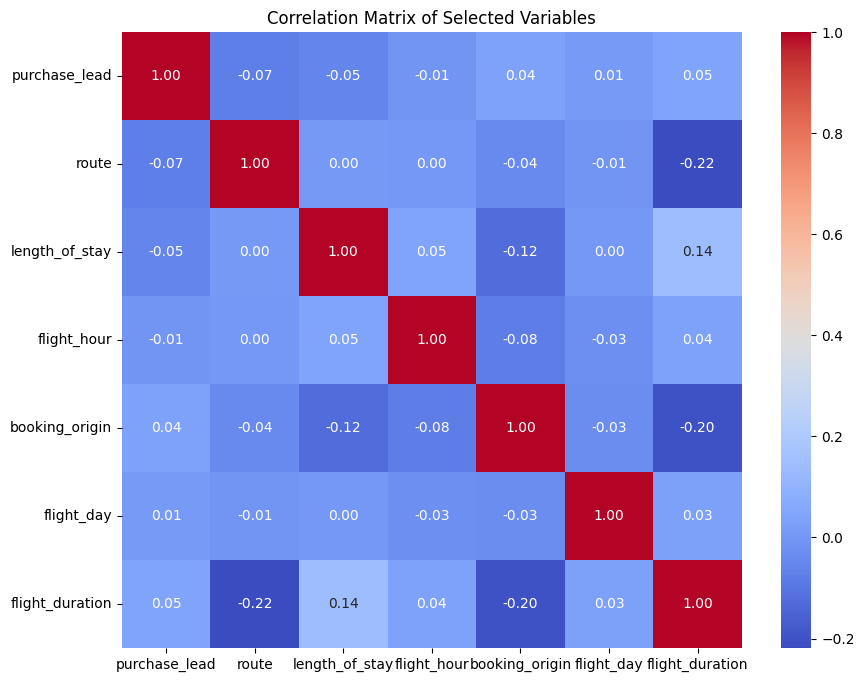

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = X_train_selected.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Selected Variables")
plt.show()


In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant for VIF calculation
X_vif = pd.get_dummies(X_train_selected, drop_first=True)  # Encode categorical variables if present
X_vif['Intercept'] = 1

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Display VIF values
print(vif_data)


           Feature        VIF
0    purchase_lead   1.011152
1            route   1.062685
2   length_of_stay   1.034886
3      flight_hour   1.008443
4   booking_origin   1.067541
5       flight_day   1.002818
6  flight_duration   1.121723
7        Intercept  47.264548


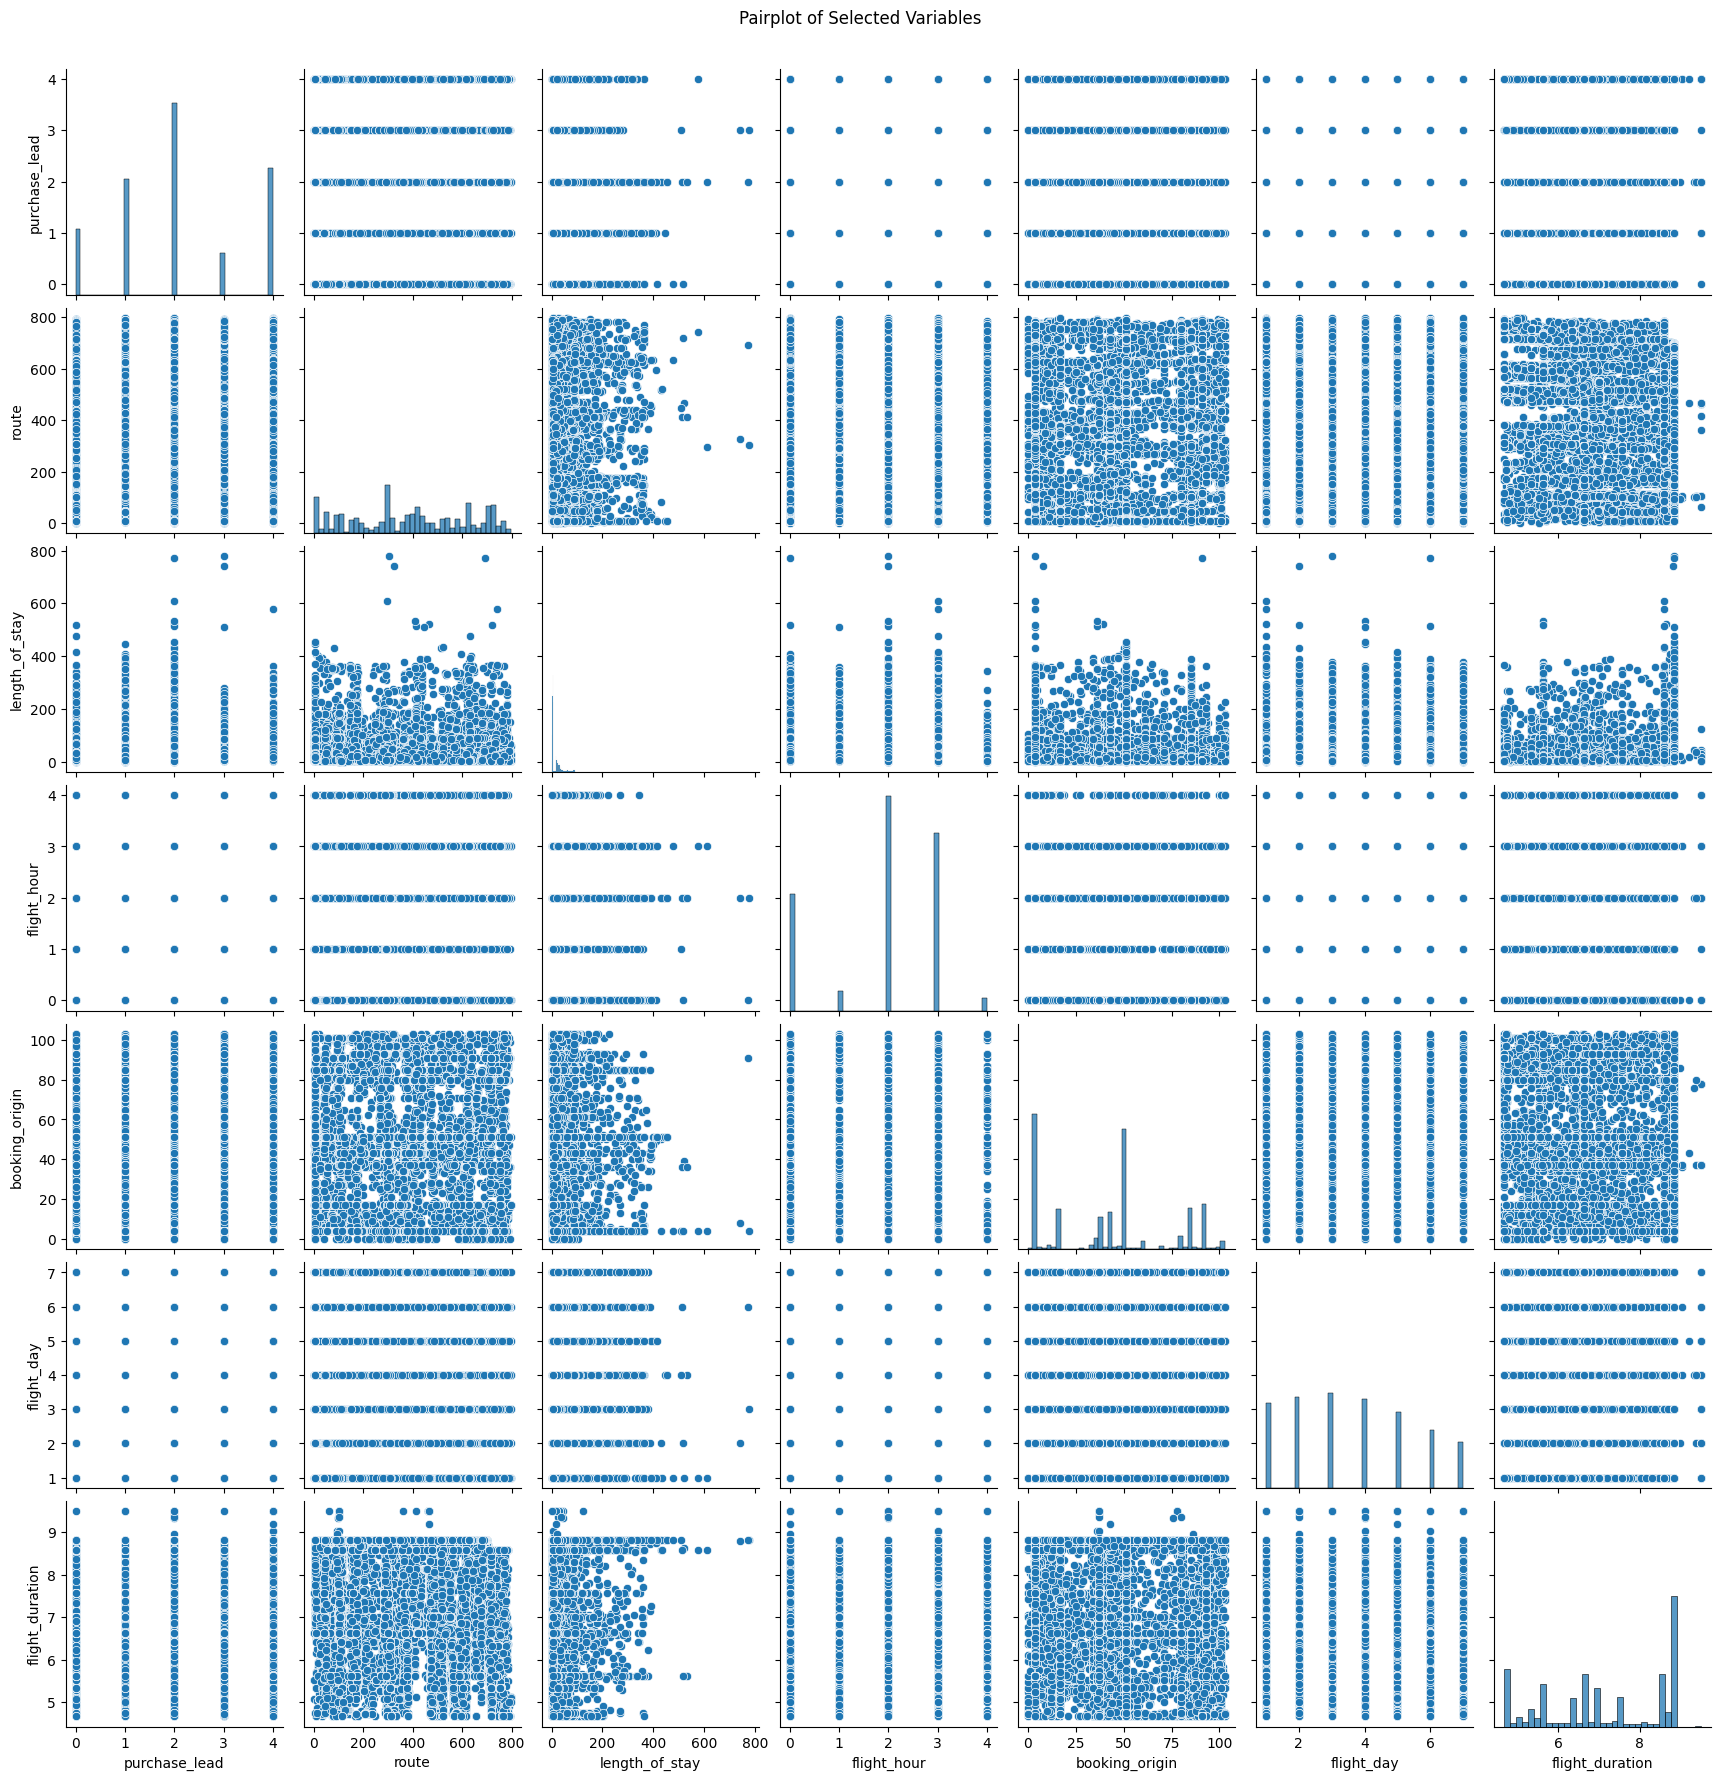

In [72]:
sns.pairplot(X_train_selected)
plt.suptitle("Pairplot of Selected Variables", y=1.02)
plt.show()


## Analysis of Multicollinearity

### Correlation Matrix
The pairwise correlation values between the selected variables are all low, with no absolute values close to 1 or -1. This indicates there are no strongly linear relationships between the variables.

### VIF Values
All VIF values are close to 1, indicating very low multicollinearity. A VIF value above 5 or 10 is usually considered a potential issue, but none of the features have such values. The high value for the intercept (47.26) is not a concern, as it does not represent a feature.

### Conclusion
The selected features do not exhibit multicollinearity. Therefore, any drop in model performance after feature selection is unlikely due to multicollinearity and may stem from other factors, such as loss of important information from the excluded variables or changes in the data distribution. You might want to experiment further with feature engineering or alternative selection methods.
